# Pandas

With Pandas (= panel data), tabular data can be handled very conveniently. More at https://pandas.pydata.org/.

Very helpful:
- https://pandas.pydata.org/docs/getting_started/intro_tutorials/index.html
- https://pandas.pydata.org/Pandas_Cheat_Sheet.pdf

Pandas uses two important data structures:
- `Series` are 1-dimensional arrays. In contrast to Numpy arrays, however, they have an additional index that can be used to conveniently access entries. Internally, this is based on Numpy arrays.
- `DataFrame` is an entire table consisting of several series (=columns) of the same length.

In [3]:
import pandas as pd
import numpy as np

#### DataFrames

In [3]:
starwars_simple = pd.DataFrame({
    "name": ["Luke", "Chewbacca", "Darth Vader"],
    "jedi": [True, False, True],
    "height": [172, 228, 202]
})
starwars_simple

,name,jedi,height
0,Luke,True,172
1,Chewbacca,False,228
2,Darth Vader,True,202


Every column is a `Series`.

In [4]:
starwars_simple["height"]
#type(starwars_simple["height"])

0    172
1    228
2    202
Name: height, dtype: int64

The first column of a DataFrame (or series) is the so-called index. It contains the *row names*. By default, these are the numbers 0, 1, 2, ...
However, you can also set a different index.

In [5]:
starwars_simple.index
starwars_simple.set_index("name")

,jedi,height
name,,
Luke,True,172
Chewbacca,False,228
Darth Vader,True,202


Man kann eine Series auch explizit erzeugen. Falls man keinen Index angibt, sind es wieder die Zahlen 0, 1, 2, ...

In [10]:
pd.Series(np.random.standard_normal(4), index = ["a", "b", "c", "d"])

a    0.596352
b    1.434111
c    0.346443
d    0.073581
dtype: float64

#### Read and write data

Pandas offers a variety of options for reading data from databases (via SQL) or from files, e.g. csv, xlsx, parquet, arrow, feather, ...

In [2]:
starwars = pd.read_csv("starwars.csv")
starwars

,name,height,mass,sex,eye_color,homeworld,jedi
0,Luke Skywalker,172,77.0,male,blue,Tatooine,True
1,R2-D2,96,32.0,none,red,Naboo,False
2,Darth Vader,202,136.0,male,yellow,Tatooine,True
3,Leia Organa,150,49.0,female,brown,Alderaan,True
4,Chewbacca,228,112.0,male,blue,Kashyyyk,False
5,Yoda,66,17.0,male,brown,NaN,True
6,Boba Fett,183,78.2,male,brown,Kamino,False


Gain initial insight into the data.

In [6]:
starwars.head()
starwars.info()
starwars.describe()
len(starwars)
starwars.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7 entries, 0 to 6
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   name       7 non-null      object 
 1   height     7 non-null      int64  
 2   mass       7 non-null      float64
 3   sex        7 non-null      object 
 4   eye_color  7 non-null      object 
 5   homeworld  6 non-null      object 
 6   jedi       7 non-null      object 
dtypes: float64(1), int64(1), object(5)
memory usage: 524.0+ bytes


(7, 7)

Reading and writing xlsx files is also no problem. Here is an example of saving the data set as xlsx. The *openpyxl* package must be installed for this.

In [8]:
starwars.to_excel("starwars.xlsx", index=False)

#### Selection of columns or rows

If you select not just one column name but a list of several columns, you get a DataFrame.

In [9]:
starwars[["name", "height"]]

,name,height
0,Luke Skywalker,172
1,R2-D2,96
2,Darth Vader,202
3,Leia Organa,150
4,Chewbacca,228
5,Yoda,66
6,Boba Fett,183


When selecting rows, you usually want to select rows that fulfill certain properties.
To do this, write a true/false vector of the length of the DataFrame in the square brackets `[]`.
Comparison operators (`<`, `>`, `==`, `<=`, `>=`, `!=`) and Boolean operators `&` (and), `|` (or) and `~` (not) are often very helpful.

In [21]:
#starwars[starwars["height"]<180]
starwars[(starwars["height"] < 180) & (starwars["sex"] == "male")]
#starwars[(starwars["height"]<180) & (starwars["jedi"] == "True")]
starwars[starwars["eye_color"].isin(["red", "blue"])]
starwars[starwars["homeworld"].isna()]

,name,height,mass,sex,eye_color,homeworld,jedi
5,Yoda,66,17.0,male,brown,NaN,True


If you want to select certain rows and columns *in one step*, `.loc` and `.iloc` are suitable.

In [22]:
starwars.iloc[0:4, [2, 4]]

,mass,eye_color
0,77.0,blue
1,32.0,red
2,136.0,yellow
3,49.0,brown


Using `.loc[rows, columns]` (= location) you can address entries via their **row index**.

In [23]:
starwars = starwars.set_index("name")
starwars

,height,mass,sex,eye_color,homeworld,jedi
name,,,,,,
Luke Skywalker,172,77.0,male,blue,Tatooine,True
R2-D2,96,32.0,none,red,Naboo,False
Darth Vader,202,136.0,male,yellow,Tatooine,True
Leia Organa,150,49.0,female,brown,Alderaan,True
Chewbacca,228,112.0,male,blue,Kashyyyk,False
Yoda,66,17.0,male,brown,NaN,True
Boba Fett,183,78.2,male,brown,Kamino,False


In [40]:
starwars.loc['R2-D2':'Yoda', "name"]

Series([], Name: name, dtype: object)

In [24]:
starwars = starwars.reset_index()
starwars

,name,height,mass,sex,eye_color,homeworld,jedi
0,Luke Skywalker,172,77.0,male,blue,Tatooine,True
1,R2-D2,96,32.0,none,red,Naboo,False
2,Darth Vader,202,136.0,male,yellow,Tatooine,True
3,Leia Organa,150,49.0,female,brown,Alderaan,True
4,Chewbacca,228,112.0,male,blue,Kashyyyk,False
5,Yoda,66,17.0,male,brown,NaN,True
6,Boba Fett,183,78.2,male,brown,Kamino,False


#### Create, remove and rename columns

When calculating new columns, the power of vectorization becomes clear.
The calculations are performed element by element for each entry of the vector.
An explicit loop is not necessary.

In [31]:
starwars["BMI"] = starwars["mass"]/(starwars["height"])**2
starwars["col2"] = 7
starwars["col3"] = np.random.randint(0, 100, len(starwars))
starwars = starwars.drop(columns=["col2", "col3"])
starwars

,name,height,mass,sex,eye_color,homeworld,jedi,BMI
0,Luke Skywalker,172,77.0,male,blue,Tatooine,True,0.002603
1,R2-D2,96,32.0,none,red,Naboo,False,0.003472
2,Darth Vader,202,136.0,male,yellow,Tatooine,True,0.003333
3,Leia Organa,150,49.0,female,brown,Alderaan,True,0.002178
4,Chewbacca,228,112.0,male,blue,Kashyyyk,False,0.002155
5,Yoda,66,17.0,male,brown,NaN,True,0.003903
6,Boba Fett,183,78.2,male,brown,Kamino,False,0.002335


If you want to perform complicated calculations, you can write a function and apply it line by line using `map()` or `apply()`. 
line by line. More on this later! 

To rename columns, pass a dictionary with entries of the form `{"old_colname": "new_colname"}` or a suitable string function to the `.rename` function.

#### Visualization

(Here only very briefly. Visualization gets an extra session).

<Axes: xlabel='height', ylabel='mass'>

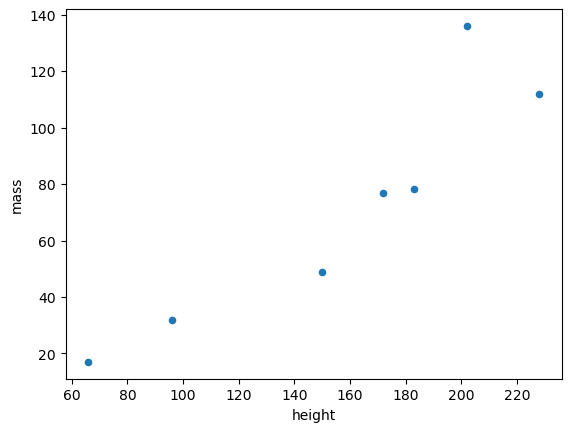

In [32]:
starwars.plot.scatter(x="height", y="mass")

#### Sorting

In [38]:
starwars.sort_values("height")
starwars.sort_values("height", ascending=False)
starwars.sort_values(["jedi", "height"], ascending=[True, False])

,name,height,mass,sex,eye_color,homeworld,jedi,BMI
4,Chewbacca,228,112.0,male,blue,Kashyyyk,False,0.002155
6,Boba Fett,183,78.2,male,brown,Kamino,False,0.002335
1,R2-D2,96,32.0,none,red,Naboo,False,0.003472
2,Darth Vader,202,136.0,male,yellow,Tatooine,True,0.003333
0,Luke Skywalker,172,77.0,male,blue,Tatooine,True,0.002603
3,Leia Organa,150,49.0,female,brown,Alderaan,True,0.002178
5,Yoda,66,17.0,male,brown,NaN,True,0.003903


Sorting the dataframe has consequences for the index. 
If you also want the index to be ordered, you can either reset the index or have it ignored directly during sorting. 

#### Aggregation of data

Typical aggregation functions such as mean(), sum(), max(), quantile() ... can be called directly as a method of `Series`.

In [41]:
starwars["mass"].mean()
starwars[["height", "mass"]].mean()

height    156.714286
mass       71.600000
dtype: float64

Very often you want to perform such aggregations in groups, i.e. for each unique value of a feature. This is known as **Split-Apply-Combine**: The overall table is split into individual tables according to the unique values of a feature, the aggregation function is calculated for each such table and then these values are collected in a smaller table.

In [42]:
starwars.groupby("jedi")[["height", "mass"]].mean()

,height,mass
jedi,,
False,169.0,74.066667
True,147.5,69.750000


We have just used a square bracket with column names directly after `.groupby()`. This is often done and restricts the individual tables to the named columns. The aggregation function then only affects these columns.

You can also group by several characteristics. The resulting object then has a MultiIndex.

Very often you want to count how often a value occurs in a column. This provides the basis for bar charts.
(Note: By default, NA values do not form a separate group and are not listed. However, this is often relevant in the context of data preparation. For this purpose, you can set the option `dropna=False` in `.groupby()` or `.value_counts()`).
As the resulting object is not a DataFrame, a `.reset_index()` is suitable for making the index an explicit column and connecting sorting steps, for example.

In [45]:
starwars.groupby("jedi").size()
starwars.groupby("homeworld", dropna=False).size()
starwars.value_counts("jedi")

jedi
True     4
False    3
Name: count, dtype: int64

There are both `.count()` and `.size()`. These are very similar. While `.size()` returns the number of rows, `.count()` returns the number of non-NA values. One function therefore counts NA values, while the other does not.

#### Merging (=joining) several tables

Very often you want to combine several tables to enrich information.
Pandas can also be used to combine several DataFrames, as in SQL.

The following table shows the development of student numbers for the TH Aschaffenburg.
Unfortunately, only the course abbreviations are included and there is also no assignment to faculties.
The second table provides this information.

In [4]:
students = pd.read_csv("TH-Aschaffenburg.csv")
students.head()

,year,degree program,freshmen,students
0,WS 02/03,BW,112.0,430
1,WS 02/03,BWR,57.0,230
2,WS 02/03,EIT,50.0,178
3,WS 02/03,M,44.0,44
4,WS 02/03,WI,69.0,183


In [5]:
names = pd.read_csv("TH-Aschaffenburg_degree_programs.csv")
names.head()

,short name,full name,faculty
0,BW,Betriebswirtschaft,WR
1,BW KMU,Betriebswirtschaft für KMU,WR
2,BWR,Betriebswirtschaft und Recht,WR
3,DIM,Digitales Immobilienmanagement,WR
4,IIM,Internationales Immobilienmanagement,WR


Using `merge()` you can perform all kinds of JOIN operations in Pandas, as we know them from SQL.
Here we want to enrich the table *th_small* with the respective degree program information.

In [7]:
pd.merge(left = students, right = names, left_on= "degree program", right_on="short name")

,year,degree program,freshmen,students,short name,full name,faculty
0,WS 02/03,BW,112.0,430,BW,Betriebswirtschaft,WR
1,WS 02/03,BWR,57.0,230,BWR,Betriebswirtschaft und Recht,WR
2,WS 02/03,EIT,50.0,178,EIT,Elektro- und Informationstechnik,IW
3,WS 02/03,M,44.0,44,M,Mechatronik,IW
4,WS 02/03,WI,69.0,183,WI,Wirtschaftsingenieurwesen,IW
...,...,...,...,...,...,...,...
303,WS 24/25,SDI,76.0,94,SDI,Software Design International,IW
304,WS 24/25,WI,57.0,177,WI,Wirtschaftsingenieurwesen,IW
305,WS 24/25,WI (berufsb),8.0,47,WI (berufsb),Wirtschaftsingenieurwesen (berufsbegl.),IW
306,WS 24/25,WIMAT,NaN,7,WIMAT,Wirtschaftsingenieurwesen/Materialtechnologien,IW


With `merge()` you can also perform other joins (RIGHT JOIN, INNER JOIN, OUTER JOIN), for example by specifying `how="outer"`.

The easiest way to combine two DataFrames is to simply append one to the other.
Of course, this only makes sense if the columns match (or are at least subsets of each other).
For example, let's look at the data for the degree programs *MEDS* and *SD*.
With `concat()`, the two tables can be appended.

#### Data wrangling for advanced users: Long format and wide format

<!--- Data source:
- Destatis, Table 12411-0015: Population: districts, reference date (selection: all reference dates). (Download flat file!)
- Destatis, Table 12411-0018: Population: districts, reference date, sex, age groups (selection: all reference dates but only the 3 districts of Aschaffenburg, Würzburg and Schweinfurt). (Download Flat-File!) -->

There are various ways of displaying the same data in tabular form.
Depending on the application, it is necessary to switch between these forms. This is sometimes known as “pivoting”.
The best way to see this is with an example. 

<!--- The following table (adapted from Destatis table 12411-0016) shows the population development of the three cities Aschaffenburg, Schweinfurt and Würzburg.-->

For the sake of simplicity, we will initially disregard the total number of students and limit ourselves to the degree programs *BW* (Business Administration), *SD* (Software Design) and *EIT* (Electrical Engineering and Information Technology) since the winter semester 2020.

In [11]:
small = students[students["degree program"].isin(["SD", "MEDS", "EIT"]) &
         (students["year"] > "WS 20")].drop(columns="freshmen")
small.head()

,year,degree program,students
197,WS 20/21,EIT,140
202,WS 20/21,MEDS,56
210,WS 20/21,SD,55
218,WS 21/22,EIT,124
223,WS 21/22,MEDS,63


The table above contains one row for each combination of academic year and subject. 
This is called **long format**.
For time series in particular, however, it is often clearer to arrange the data differently.
In this case, we want to display the enrolment figures for each subject in a separate column.
This is then the **wide format**.

With the function `pivot()` you can “rotate” the fields appropriately.
Here you must specify which columns are to be retained as an index, which column contains the new column names and which are the actual values.
The wide format may seem clearer, but has the disadvantage that you have to change the table schema when new study programs are added.

In [13]:
small_wide = small.pivot(index = "year", columns="degree program", values="students")
small_wide

degree program,EIT,MEDS,SD
year,,,
WS 20/21,140,56,55
WS 21/22,124,63,90
WS 22/23,126,78,138
WS 23/24,110,83,183
WS 24/25,111,86,169


Of course, you can also convert from wide format to long format.
This works with `melt()`.
(First, however, we use `reset_index()` to make the index a regular column).
In the argument `id_vars` we list all columns that are to be kept constant - all other columns are "pivoted" to two new columns, in that each combination of column name and respective entry forms a new line. 

In [14]:
small_wide.reset_index().melt(id_vars="year")

,year,degree program,value
0,WS 20/21,EIT,140
1,WS 21/22,EIT,124
2,WS 22/23,EIT,126
3,WS 23/24,EIT,110
4,WS 24/25,EIT,111
5,WS 20/21,MEDS,56
6,WS 21/22,MEDS,63
7,WS 22/23,MEDS,78
8,WS 23/24,MEDS,83
9,WS 24/25,MEDS,86


We had just restricted the data set to the number of freshmen and removed the *students* column.
So we only let `pivot()` pivot the column *freshmen*.

If, on the other hand, we leave the student numbers in the data set, we can also pivot them.
This results in a **MultiIndex** for the columns.

Closely related to `pivot()` and `melt()` are the `stack()` and `unstack()` functions.
They are particularly useful in combination with indexes and MultiIndexes.

- `stack()` pivots all column labels (except the index) and returns a series (or a DataFrame) with an additional inner index level.
- `unstack()` pivots the innermost index level to column labels and thus creates a DataFrame.

For the sake of clarity, let's restrict ourselves to the beginner numbers above.

`stack()` rotates all column names to a new inner index level and thus returns a series with a two-level multi-index.

Using `unstack()`, the innermost level of a MultiIndex becomes new column names and we get the original DataFrame again.
(If you want to pivot another index level instead of the innermost level, you can specify an index level using both `stack` and `unstack`).

By the way: Instead of calling `pivot` you can also use `set_index` to create a MultiIndex and then call `unstack`.